# Informal Notes on Pytorch, Geotorch and Reduced Density Matrices
### C. L. Benavides Riveros (MPI PKS Dresden, 02.11.2021)

These notes are based on J. Schmidt, M. Fadel, and C. L. Benavides-Riveros, "Machine learning universal bosonic functionals", Phys. Rev. Research 3, L032063 (2021) https://journals.aps.org/prresearch/abstract/10.1103/PhysRevResearch.3.L032063. This paper contains the first machine-learning implementation for reduced density matrix functional theory. The results apply for bosons but can ge generalized to fermionic systems. 

# Pytorch 

[PyTorch](https://pytorch.org/) is a very powerful machine learning framework. We will start with tensors, which are central to Pytorch.

In [65]:
import torch

## Tensor properties

One way to create tensors from a list or an array is to use `torch.Tensor`. 

In [66]:
example_tensor = torch.Tensor(
    [
     [[1, 2], [3, 4]], 
     [[5, 6], [7, 8]], 
     [[9, 0], [1, 2]]
    ]
)

In [3]:
example_tensor

tensor([[[1., 2.],
         [3., 4.]],

        [[5., 6.],
         [7., 8.]],

        [[9., 0.],
         [1., 2.]]])

In [64]:
example_tensor.shape

torch.Size([3, 2, 2])

In [5]:
torch.randn_like(example_tensor)

tensor([[[-0.6081,  0.7837],
         [ 0.2408, -0.1180]],

        [[ 0.9361, -0.3378],
         [ 0.4772,  0.2150]],

        [[-0.5505,  0.9061],
         [ 1.3235,  0.5567]]])

In [6]:
example_tensor[2]

tensor([[9., 0.],
        [1., 2.]])

## Tensor contractions (Einstein convention)

`Einsum` allows computing many common multi-dimensional linear algebraic array operations by representing them in a short-hand format based on the Einstein summation convention.

In [7]:
torch.einsum('ijj->i', example_tensor)

tensor([ 5., 13., 11.])

In [8]:
torch.einsum('ijk,ijk->i', example_tensor, example_tensor)

tensor([ 30., 174.,  86.])

In [9]:
torch.einsum('ijk,ljk->il', example_tensor,example_tensor)

tensor([[ 30.,  70.,  20.],
        [ 70., 174.,  68.],
        [ 20.,  68.,  86.]])

In [10]:
torch.einsum('ijk,rsk->ijrs', example_tensor,example_tensor)

tensor([[[[  5.,  11.],
          [ 17.,  23.],
          [  9.,   5.]],

         [[ 11.,  25.],
          [ 39.,  53.],
          [ 27.,  11.]]],


        [[[ 17.,  39.],
          [ 61.,  83.],
          [ 45.,  17.]],

         [[ 23.,  53.],
          [ 83., 113.],
          [ 63.,  23.]]],


        [[[  9.,  27.],
          [ 45.,  63.],
          [ 81.,   9.]],

         [[  5.,  11.],
          [ 17.,  23.],
          [  9.,   5.]]]])

In [11]:
As = torch.randn(3,2,5)
Bs = torch.randn(3,5,4)
torch.einsum('bij,bjk->bik', As, Bs)

tensor([[[-0.8150,  1.6466,  0.0954,  0.7470],
         [ 0.2164,  1.1494, -1.6465, -0.8918]],

        [[ 1.4303,  4.8862,  5.8892,  0.1721],
         [ 0.0269, -1.5002, -3.1936, -0.6372]],

        [[-3.4936, -1.1925, -0.5862,  0.2571],
         [ 1.4357,  0.2745, -1.9916,  0.0249]]])

## PyTorch Neural Network Module (`torch.nn`)

PyTorch has a lot of powerful classes in its `torch.nn` module. These classes allow you to create a new function which transforms a tensor in specific way, often retaining information when called multiple times.

In [12]:
import torch.nn as nn

## `nn.Linear`

To create a linear layer, you need to pass it the number of input dimensions and the number of output dimensions. The linear object initialized as `nn.Linear(10, 2)` will take in a $n\times10$ matrix and return an $n\times2$ matrix, where all $n$ elements have had the same linear transformation performed. For example, you can initialize a linear layer which performs the operation $Ax + b$, where $A$ and $b$ are initialized randomly when you generate the [`nn.Linear()`](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html) object. 

In [13]:
torch.randn(3, 10)

tensor([[-0.8280, -0.9334, -1.6728, -0.8842, -1.3896,  0.3739, -1.1935, -0.8773,
          0.3528, -0.1589],
        [ 0.1729, -1.4488, -0.0967, -0.6027,  0.1914, -0.9506,  1.8017, -0.3098,
          0.2894,  1.3855],
        [ 0.7086,  0.9354, -0.1732, -0.2776,  1.7566, -1.7915, -2.1390, -0.2738,
          0.5790,  0.3854]])

In [14]:
linear = nn.Linear(10, 2)
example_input = torch.randn(3, 10)
example_output = linear(example_input)
example_output

tensor([[ 0.8743,  1.2610],
        [-0.8415,  0.1960],
        [ 0.5328,  1.5000]], grad_fn=<AddmmBackward>)

## `nn.ReLU`

[`nn.ReLU()`](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html) will create an object that, when receiving a tensor, will perform a ReLU activation function. A ReLU non-linearity sets all negative numbers in a tensor to zero. In general, the simplest neural networks are composed of series of linear transformations, each followed by activation functions.


In [15]:
relu = nn.ReLU()
relu_output = relu(example_output)
relu_output

tensor([[0.8743, 1.2610],
        [0.0000, 0.1960],
        [0.5328, 1.5000]], grad_fn=<ReluBackward0>)

## `nn.BatchNorm1d`

[`nn.BatchNorm1d`](https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm1d.html) is a normalization technique that will rescale a batch of $n$ inputs to have a consistent mean and standard deviation between batches.  

As indicated by the `1d` in its name, this is for situations where you expects a set of inputs, where each of them is a flat list of numbers. In other words, each input is a vector, not a matrix or higher-dimensional tensor. For a set of images, each of which is a higher-dimensional tensor, you'd use [`nn.BatchNorm2d`](https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm2d.html), discussed later on this page.

`nn.BatchNorm1d` takes an argument of the number of input dimensions of each object in the batch (the size of each example vector).

In [16]:
batchnorm = nn.BatchNorm1d(2)
batchnorm_output = batchnorm(relu_output)
batchnorm_output

tensor([[ 1.1264,  0.4858],
        [-1.3037, -1.3931],
        [ 0.1773,  0.9073]], grad_fn=<NativeBatchNormBackward>)

In [17]:
batchnorm_output.mean()

tensor(3.9736e-08, grad_fn=<MeanBackward0>)

In [18]:
batchnorm_output.std()

tensor(1.0954, grad_fn=<StdBackward0>)

## `nn.Sequential`

[`nn.Sequential`](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html) creates a single operation that performs a sequence of operations. For example, you can write a neural network layer with a batch normalization as

In [19]:
mlp_layer = nn.Sequential(
    nn.Linear(5, 2),
    nn.BatchNorm1d(2),
    nn.ReLU()
)

test_example = torch.randn(5,5) + 1
print("input: ")
print(test_example)
print("output: ")
print(mlp_layer(test_example))

input: 
tensor([[ 0.9522,  3.5878,  1.3278,  2.0213,  0.1775],
        [ 2.1832,  1.0042,  0.1558,  2.1635,  2.4967],
        [ 0.1964,  0.9531,  1.3481,  1.0078,  1.8359],
        [ 1.1636,  0.5251,  1.7301,  1.3795,  1.1197],
        [ 0.7032,  0.5826, -0.9547,  0.9279,  1.7841]])
output: 
tensor([[1.7568, 0.0000],
        [0.1537, 0.0000],
        [0.0000, 1.1032],
        [0.0000, 1.1610],
        [0.0000, 0.0000]], grad_fn=<ReluBackward0>)


# Optimization

One of the most important aspects of essentially any machine learning framework is its automatic differentiation library. 

## Optimizers

To create an optimizer in PyTorch, you'll need to use the `torch.optim` module, often imported as `optim`. [`optim.Adam`](https://pytorch.org/docs/stable/optim.html#torch.optim.Adam) corresponds to the Adam optimizer. To create an optimizer object, you'll need to pass it the parameters to be optimized and the learning rate, `lr`, as well as any other parameters specific to the optimizer.

For all `nn` objects, you can access their parameters as a list using their `parameters()` method, as follows:


In [20]:
import torch.optim as optim
adam_opt = optim.Adam(mlp_layer.parameters(), lr=1e-1)

## Training Loop

A (basic) training step in PyTorch consists of four basic parts:


1.   Set all of the gradients to zero using `opt.zero_grad()`
2.   Calculate the loss, `loss`
3.   Calculate the gradients with respect to the loss using `loss.backward()`
4.   Update the parameters being optimized using `opt.step()`

That might look like the following code (and you'll notice that if you run it several times, the loss goes down):

In [21]:
train_example = torch.randn(100,5) + 1
adam_opt.zero_grad()

# The loss function is the mean distance from 1

cur_loss = torch.abs(1 - mlp_layer(train_example)).mean()

cur_loss.backward()
adam_opt.step()
print(cur_loss)

tensor(0.7849, grad_fn=<MeanBackward0>)


## `requires_grad_()`

You can also tell PyTorch that it needs to calculate the gradient with respect to a tensor that you created by saying `example_tensor.requires_grad_()`, which will change it in-place. This means that even if PyTorch wouldn't normally store a grad for that particular tensor, it will for that specified tensor.

## `with torch.no_grad():`

PyTorch will usually calculate the gradients as it proceeds through a set of operations on tensors. This can often take up unnecessary computations and memory, especially if you're performing an evaluation. However, you can wrap a piece of code with `with torch.no_grad()` to prevent the gradients from being calculated in a piece of code. 

# New `nn` Classes

You can also create new classes which extend the `nn` module. For these classes, all class attributes, as in `self.layer` or `self.param` will automatically treated as parameters if they are themselves `nn` objects or if they are tensors wrapped in `nn.Parameter` which are initialized with the class. 

The `__init__` function defines what will happen when the object is created. The first line of the init function of a class, for example, `WellNamedClass`, needs to be `super(WellNamedClass, self).__init__()`. 

The `forward` function defines what runs if you create that object `model` and pass it a tensor `x`, as in `model(x)`. If you choose the function signature, `(self, x)`, then each call of the forward function, gets two pieces of information: `self`, which is a reference to the object with which you can access all of its parameters, and `x`, which is the current tensor for which you'd like to return `y`.

One class might look like the following:

In [22]:
class ExampleModule(nn.Module):
    def __init__(self, input_dims, output_dims):
        super(ExampleModule, self).__init__()
        self.linear = nn.Linear(input_dims, output_dims)
        self.exponent = nn.Parameter(torch.tensor(1.))

    def forward(self, x):
        x = self.linear(x)

        # This is the notation for element-wise exponentiation, 
        # which matches python in general
        x = x ** self.exponent 
        
        return x

And one can view its parameters as follows

In [23]:
example_model = ExampleModule(10, 2)
list(example_model.parameters())

[Parameter containing:
 tensor(1., requires_grad=True), Parameter containing:
 tensor([[ 3.0352e-01,  2.9441e-01, -2.9007e-02, -1.6813e-04, -2.2493e-01,
           6.2298e-02, -1.3687e-01, -2.2963e-01, -2.3968e-01,  7.0037e-02],
         [-2.7460e-01, -3.0752e-01,  2.5268e-02,  2.7155e-01,  1.6057e-02,
          -2.2874e-01,  1.4943e-01, -1.8954e-01, -8.9467e-03,  7.7272e-02]],
        requires_grad=True), Parameter containing:
 tensor([ 0.2367, -0.2848], requires_grad=True)]

In [24]:
list(example_model.named_parameters())

[('exponent', Parameter containing:
  tensor(1., requires_grad=True)), ('linear.weight', Parameter containing:
  tensor([[ 3.0352e-01,  2.9441e-01, -2.9007e-02, -1.6813e-04, -2.2493e-01,
            6.2298e-02, -1.3687e-01, -2.2963e-01, -2.3968e-01,  7.0037e-02],
          [-2.7460e-01, -3.0752e-01,  2.5268e-02,  2.7155e-01,  1.6057e-02,
           -2.2874e-01,  1.4943e-01, -1.8954e-01, -8.9467e-03,  7.7272e-02]],
         requires_grad=True)), ('linear.bias', Parameter containing:
  tensor([ 0.2367, -0.2848], requires_grad=True))]

And here's an example of the class in action:

In [25]:
input = torch.randn(2, 10)
example_model(input)

tensor([[-0.1598, -0.9256],
        [ 0.0323, -0.0612]], grad_fn=<PowBackward1>)

# 2D Operations


*   2D convolutions: [`nn.Conv2d`](https://pytorch.org/docs/master/generated/torch.nn.Conv2d.html) requires the number of input and output channels, as well as the kernel size.
*   2D transposed convolutions (aka deconvolutions): [`nn.ConvTranspose2d`](https://pytorch.org/docs/master/generated/torch.nn.ConvTranspose2d.html) also requires the number of input and output channels, as well as the kernel size
*   2D batch normalization: [`nn.BatchNorm2d`](https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm2d.html) requires the number of input dimensions
*   Resizing images: [`nn.Upsample`](https://pytorch.org/docs/master/generated/torch.nn.Upsample.html) requires the final size or a scale factor. Alternatively, [`nn.functional.interpolate`](https://pytorch.org/docs/stable/nn.functional.html#torch.nn.functional.interpolate) takes the same arguments.

# Application to Reduced Density Matrix Functional Theory


The one-body reduced density matrix (1RDM) $\gamma$ plays a fundamental role in describing and predicting quantum features of bosonic systems, such as Bose-Einstein condensation. The reduced density matrix functional theory for bosonic ground states establishes the existence of a universal functional $\mathcal{F}[\gamma]$ that recovers quantum correlations exactly.  

Let us consider Hamiltonians of the form  $H( h) \equiv  h+ W$,
 with a one-particle term $ h =  t + v$, containing the kinetic energy and the external potential terms, and the two-particle interaction $W$. The ground-state energy and  1RDM follow for any choice of the one-particle Hamiltonian $h$ from the minimization of the total energy functional $\mathcal{E}_h[\gamma]=  \mbox{Tr}[h \gamma] + \mathcal{F}_W[\gamma]$. The functional $\mathcal{F}_W[\gamma]$ is universal in the sense that it depends only on the fixed interparticle interaction $W$, and not on the one-particle Hamiltonian $h$. 
 
Hence, determining the functional $\mathcal{F}_W[\gamma]$ would in principle entail the simultaneous solution of the universal correlation part of the ground state problem for any Hamiltonian $H_W(h)$. By  writing the ground-state energy as $E(h)\equiv \min_{\Gamma}\mbox{Tr}_N[H_W(h)\Gamma ]$, and using the fact that the expectation value of $h$ is determined by $\gamma$, one can replace the functional $\mathcal{F}_W[\gamma]$ by the well-known constrained search approach : $ \mathcal{F}_W[\gamma]  = \min_{\Gamma\mapsto \gamma} \mbox{Tr}_N[ W\Gamma]$.
where $\Gamma \mapsto \gamma$ indicates that the minimization is carried out over all $\Gamma$ whose 1RDM is $\gamma$. The main challenge of this approach is that the set of $\Gamma$ such that $\Gamma\mapsto \gamma$ is in general extremely complex to characterize, and so far only partial results are known for quasi-extremal, two-particle or translational invariant fermionic systems.

To make progress on this problem let us represent $\gamma$, the 1RDM of a $N$-boson real wave function $\Psi$, with respect to a set of creation and annihilation operators 
$\gamma_{ij} = \langle\Psi|  b^\dagger_i b_j |\Psi\rangle$,
 and assume that the dimension of the one-particle Hilbert space is $M$. Let us also define $M$ ($N-1$)-particle wave functions $|\Phi_j\rangle \equiv  b_j |\Psi\rangle$,
which satisfy by definition the condition
$\langle\Phi_i|\Phi_j\rangle = \gamma_{ij}$.
 The meaning of these non-normalized wave functions is clear: while their magnitude equals the diagonal entries of $\gamma$, the angles they form correspond to the non-diagonal entries of $\gamma$.
 
 ## Bose-Hubbard model
 
The Hamiltonian of the Bose-Hubbard model reads:
$$
H = -t \sum_{\langle ij \rangle}
 b_i^\dagger  b_j+\frac{U}2\!\sum^M_{j=1}\! n_j(n_j-1)\,,
$$
where the operator $ b^\dagger_{j}$ ($b_{j}$) create (annihilate) a boson on site $j$, and $\hat n_{j}$ is the corresponding number operator. For a given $\gamma$ let us take the minimizer of the functional and call it $|\Psi_\gamma \rangle \in \mathcal{H}_N$, the $N$-particle Hilbert space. Using the prescription discussed above let us define $M$ ($N-1$)-particle wave functions $|\Phi_{\gamma,j}\rangle \equiv b_j |\Psi_\gamma\rangle \in \mathcal{H}_{N-1}$. The functional is given by $\mathcal{F}_{N,M}[\gamma] = \sum_i \langle\Phi_{\gamma,i}| n_i |\Phi_{\gamma,i}\rangle$, using $n_i(n_i-1) = b^\dagger_i n_i  b_i$. Any rotation of the states $|\Phi_{\gamma,i}\rangle$ in the subspace spanned by themselves: $\mathcal{G}_{\gamma} = {\rm span}\{|\Phi_{\gamma,1}\rangle,\dots,|\Phi_{\gamma,M}\rangle\}$, will give an energy greater  or equal than the energy $\mathcal{F}_{N,M}[\gamma]$.
As a consequence, we obtain the following crucial result:
$$
\mathcal{F}_{N,M}[\gamma] = \min_{\{\Phi_i\}\in \mathcal{G}_\gamma} \sum_i \langle\Phi_i| n_i |\Phi_i\rangle\,,
$$
subject to $\langle\Phi_i|\Phi_i\rangle = N/M$ and $\langle\Phi_i|\Phi_j\rangle = \gamma_{ij}$. This indicates that the constraint can be transferred to the subspace $\mathcal{G}_{\gamma}$. This result leads to a quite efficient optimization problem for the functional.


<div>
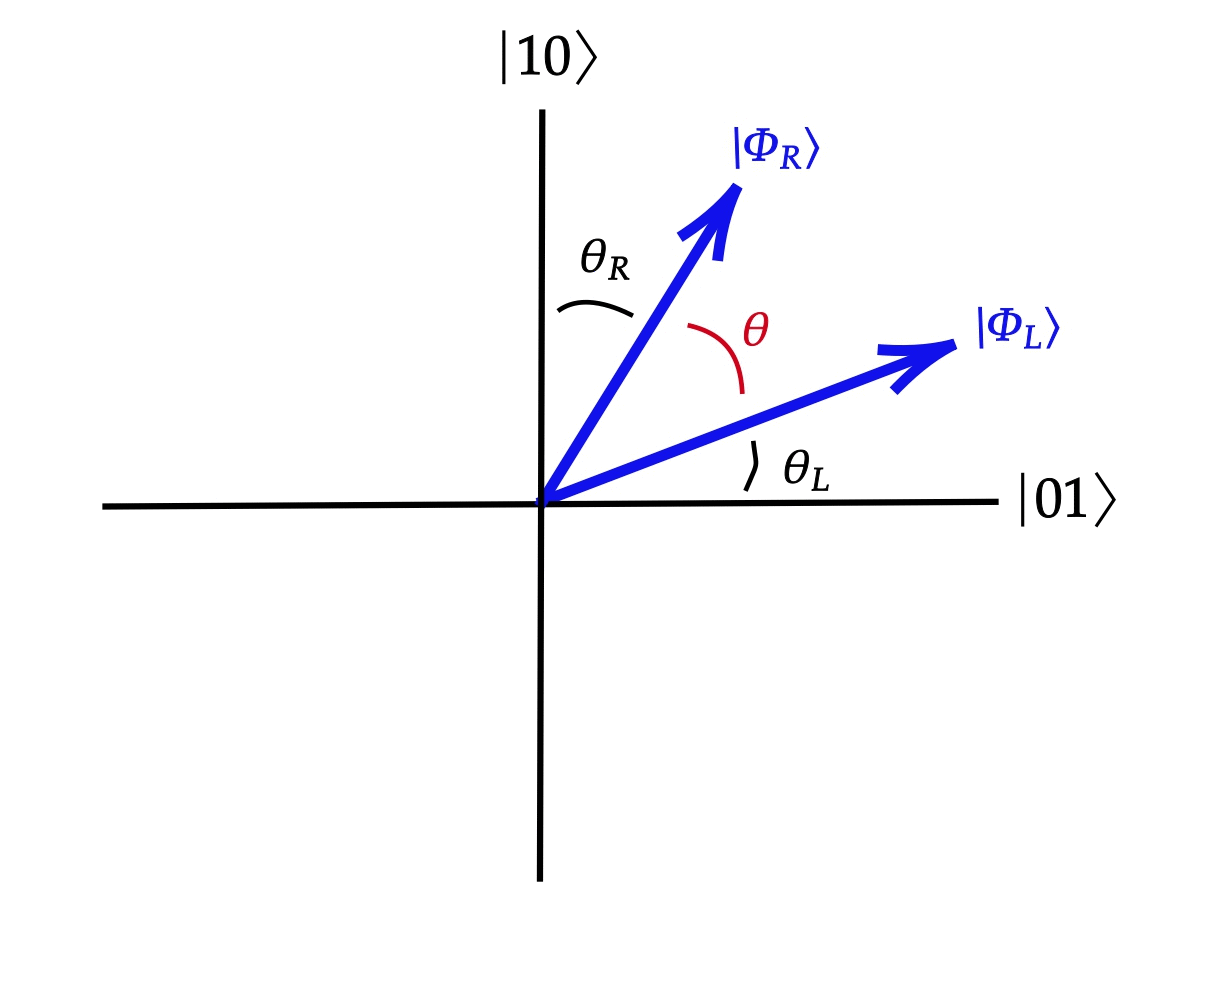
</div>

# Geotorch 
GeoTorch (https://github.com/Lezcano/geotorch) provides a simple way to perform constrained optimization and optimization on manifolds in PyTorch. It is compatible out of the box with any optimizer, layer, and model implemented in PyTorch without any boilerplate in the training code. Just state the constraints when you construct the model and you are ready to go!

Supported Spaces: Each constraint in GeoTorch is implemented as a manifold. These give the user more flexibility on the options that they choose for each parametrization. All these support Riemannian Gradient Descent by default (more on this here), but they also support optimization via any other PyTorch optimizer. GeoTorch currently supports several spaces. For us, the important space is SO(n), the  manifold of n×n orthogonal matrices.


In [48]:
import torch, geotorch, torch.nn as nn
import numpy as np
from itertools import product

In [45]:
def is_pos_def(x):
    return np.all(np.linalg.eigvals(x) > 0)

class Functional(nn.Module):
    def __init__(self, size):
        super(Functional, self).__init__()
        self.weight = torch.nn.Parameter(torch.randn(size, size),requires_grad=True)
    def forward(self, S,L):
        DD = torch.einsum('ij,jk->ik', S, self.weight)
        return torch.einsum('ij,ij,ij->', DD, DD, L)

class Model(nn.Module):
    def __init__(self, size):
        super(Model, self).__init__()
        self.functional = Functional(size)
        geotorch.orthogonal(self.functional, "weight")
    def forward(self, S,L):
        return self.functional(S,L)

In [53]:
"""
N Number of particles
M Number of sites
"""
Steps = 10        # Number of RDMs 
N, M = 4,4        # Number of particles, number of sites


E0, BEC = (N**2/M)-N, N*(N-1)/M      # Number of particles, number of sites, Energies
lista = list(range(0,int(N/M)+1))
Lambda = [i for i in product(lista, repeat=M) if sum(i)==N-1]
Lambda = np.matrix.transpose(np.array(Lambda))

In [29]:
print(E0, BEC, Lambda)

0.0 3.0 [[0 1 1 1]
 [1 0 1 1]
 [1 1 0 1]
 [1 1 1 0]]


In [58]:
list1 = []
list2 = []

for x in range(0,Steps):
    eta = (x+1)*(N/M)/Steps
    RDM = [[eta**2 for x in range(M)] for y in range(M)] 
    for i in range(M-1):
        RDM[i][i] = N/M
        RDM[i][i+1] = eta
        RDM[i+1][i] = eta
    RDM[M-1][M-1] = N/M
    if is_pos_def(RDM) == True:                     # Is positive definite?
        list1.insert(x,1/Steps*(x+1))
        aa, U = np.linalg.eigh(RDM)
        Sigma = np.diagflat(np.sqrt(aa))
        Sigma2 = np.matrix.transpose(Sigma)
        USigma = np.matmul(U, Sigma2)
        model = Model(Lambda.shape[1]).double()
        optim = torch.optim.Adam(model.parameters(), lr=0.001)
        torch.set_default_tensor_type(torch.DoubleTensor)
        USigma = (torch.tensor(USigma)*1.0).double()
        Lambda = (torch.tensor(Lambda)*1.0).double()
        for i in range(5000):
            loss =model(USigma,Lambda)
            #print(loss)
            optim.zero_grad()
            loss.backward()
            optim.step()
        list2.insert(x,loss.item())
        print(eta,loss.item())
list2 = np.array(list2)-E0

/home/carlos/software/python/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


0.1 0.015086051954896817
0.2 0.06128265733412009
0.3 0.141138995049633
0.4 0.25862680240309927
0.5 0.4194004011497452
0.6 0.6316854234481234
0.7 0.9084789680547939
0.8 1.2736010246004086
0.9 1.784967402949372


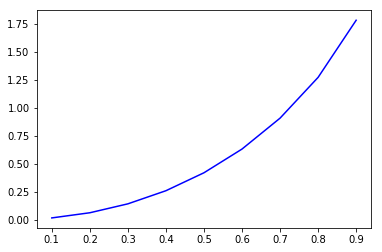

In [60]:
import matplotlib.pyplot as plt

plt.plot(list1, list2,  'blue')

plt.show()

Recent papers based on our research:

[1] T. Maciążek, Repulsively diverging gradient of the density functional in the reduced density matrix functional theory, New Journal of Physics, 23 113006 (2021).

[2] T. S. Müller and G. M. Pastor, Density-matrix functional theory of the attractive Hubbard model: Statistical analogy of pairing correlations, arXiv:2110.07422 (2021).

[3] J. Gedeon et alt., Machine learning the derivative discontinuity of density-functional theory, Machine Learning: Science and Thechnology (in press). 

# Outlook 2022:

Superconductivity: 1RDM in Nambu-Gorkov space

Quick and cheap phase diagrams.

Disorder?